# Happiness in Egypt: A Data-Driven Analysis of Well-Being in 2019

This project aims to analyze and interpret global happiness levels using the 2019 World Happiness Report dataset. By leveraging data preprocessing, statistical analysis, and visualization techniques, the study seeks to uncover key factors influencing happiness across different countries.

This project also aims to analyze Egypt’s happiness ranking in the 2019 World Happiness Report, exploring the key factors influencing the country’s well-being compared to global and regional trends. By utilizing data preprocessing, statistical analysis, and visualizations

# Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/kaggle/input/world-happiness/2019.csv")
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


* Checking the rank of happiness of Egypt!

In [6]:
eg_data = data[data['Country or region'] == 'Egypt']
eg_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
136,137,Egypt,4.166,0.913,1.039,0.644,0.241,0.076,0.067


In [7]:
data.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


# Data Preprocessing

In [10]:
# Renaming columns and removing unnecessary ones
data.rename(columns = {
    "Overall rank" : "overall_rank",
	"Country or region" : "country",
	"Score" : "score",
	"GDP per capita" : "gdp",
	"Social support" : "social_support",
	"Healthy life expectancy" : "health",
	"Freedom to make life choices" : "freedom",
	"Generosity" : "generosity",
	"Perceptions of corruption": "perceptions"
}, inplace = True)

data = data.drop("overall_rank", axis=1)
data = data.drop("social_support", axis=1)

data.head()

,country,score,gdp,health,freedom,generosity,perceptions
0,Finland,7.769,1.340,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,0.999,0.557,0.322,0.298


## Secching for Duplicated Data

In [12]:
duplicated_data = data[data.duplicated()]
duplicated_data

,country,score,gdp,health,freedom,generosity,perceptions


No duplicates are found!

## Checking Missing Data

In [13]:
data.isnull().sum()

country        0
score          0
gdp            0
health         0
freedom        0
generosity     0
perceptions    0
dtype: int64

No missing data is found!

# Data Exploration

In [14]:
data.columns

Index(['country', 'score', 'gdp', 'health', 'freedom', 'generosity',
       'perceptions'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      156 non-null    object 
 1   score        156 non-null    float64
 2   gdp          156 non-null    float64
 3   health       156 non-null    float64
 4   freedom      156 non-null    float64
 5   generosity   156 non-null    float64
 6   perceptions  156 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.7+ KB


In [20]:
data.describe()

,score,gdp,health,freedom,generosity,perceptions
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.141000,0.631000,0.566000,0.453000


In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
gdp,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
health,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
freedom,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
perceptions,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


# EDA and Visualization

## Top 10 Happiest Countries

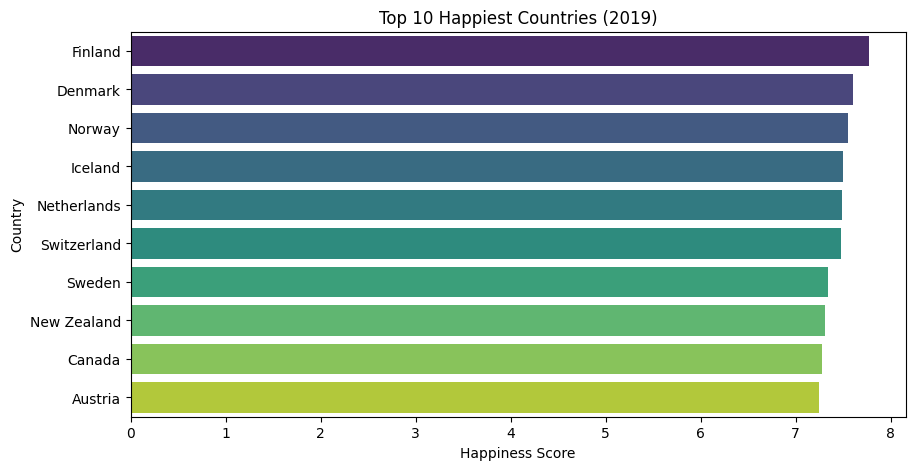

In [26]:
# Bar Chart: Top 10 Happiest Countries
top_10 = data.nlargest(10, "score")
plt.figure(figsize=(10, 5))
sns.barplot(y=top_10["country"], x=top_10["score"], palette="viridis")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.title("Top 10 Happiest Countries (2019)")
plt.show()

## GDP Vs. Happiness Score

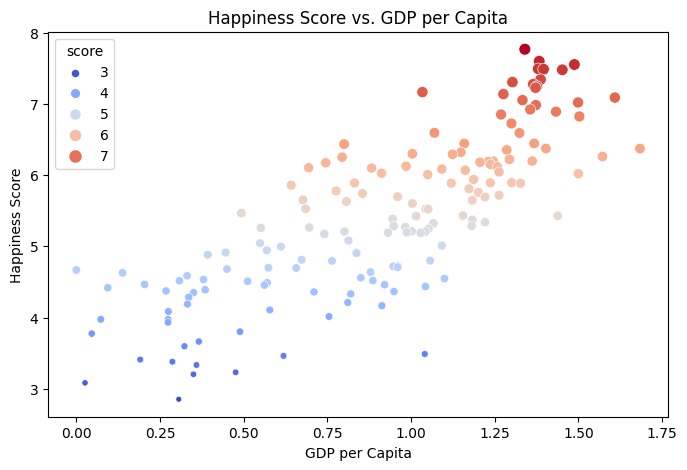

In [27]:
# Scatter Plot: GDP per capita vs. Happiness Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["gdp"], y=data["score"], hue=data["score"], palette="coolwarm", size=data["score"])
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("Happiness Score vs. GDP per Capita")
plt.show()

## Happiness Score Distribution

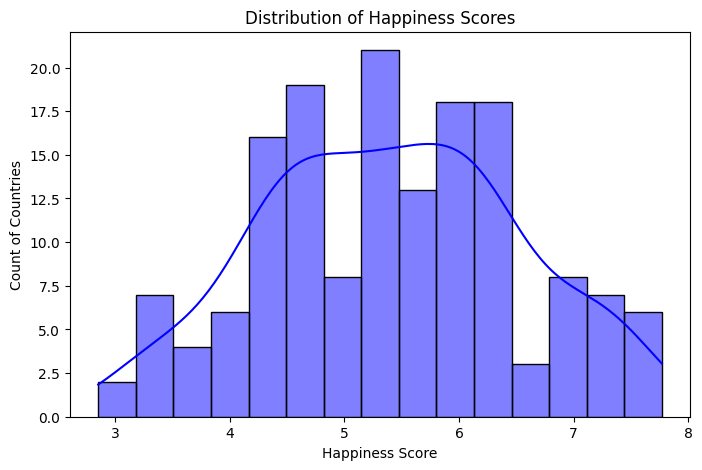

In [35]:
# Histogram: Happiness Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data["score"], bins=15, kde=True, color="blue")
plt.xlabel("Happiness Score")
plt.ylabel("Count of Countries")
plt.title("Distribution of Happiness Scores")
plt.show()

## Correlation Heatmap

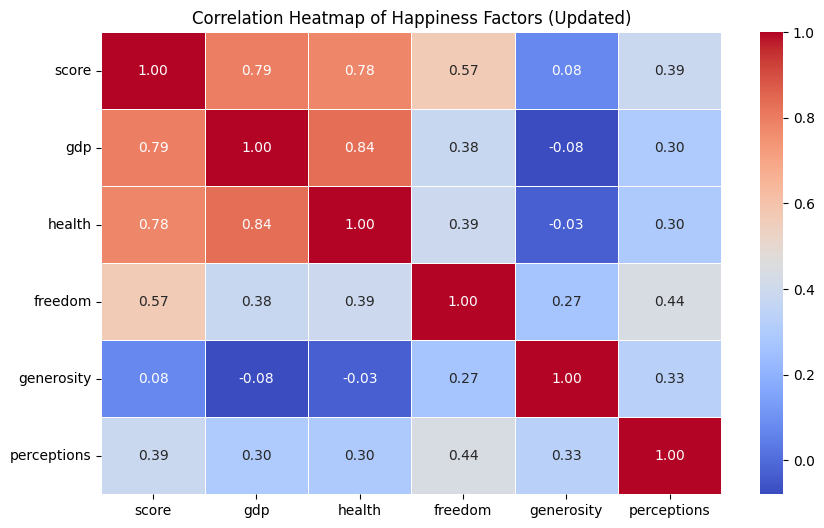

In [30]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = data.corr(numeric_only=True)  
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Happiness Factors (Updated)")
plt.show()

## Relationships between Features

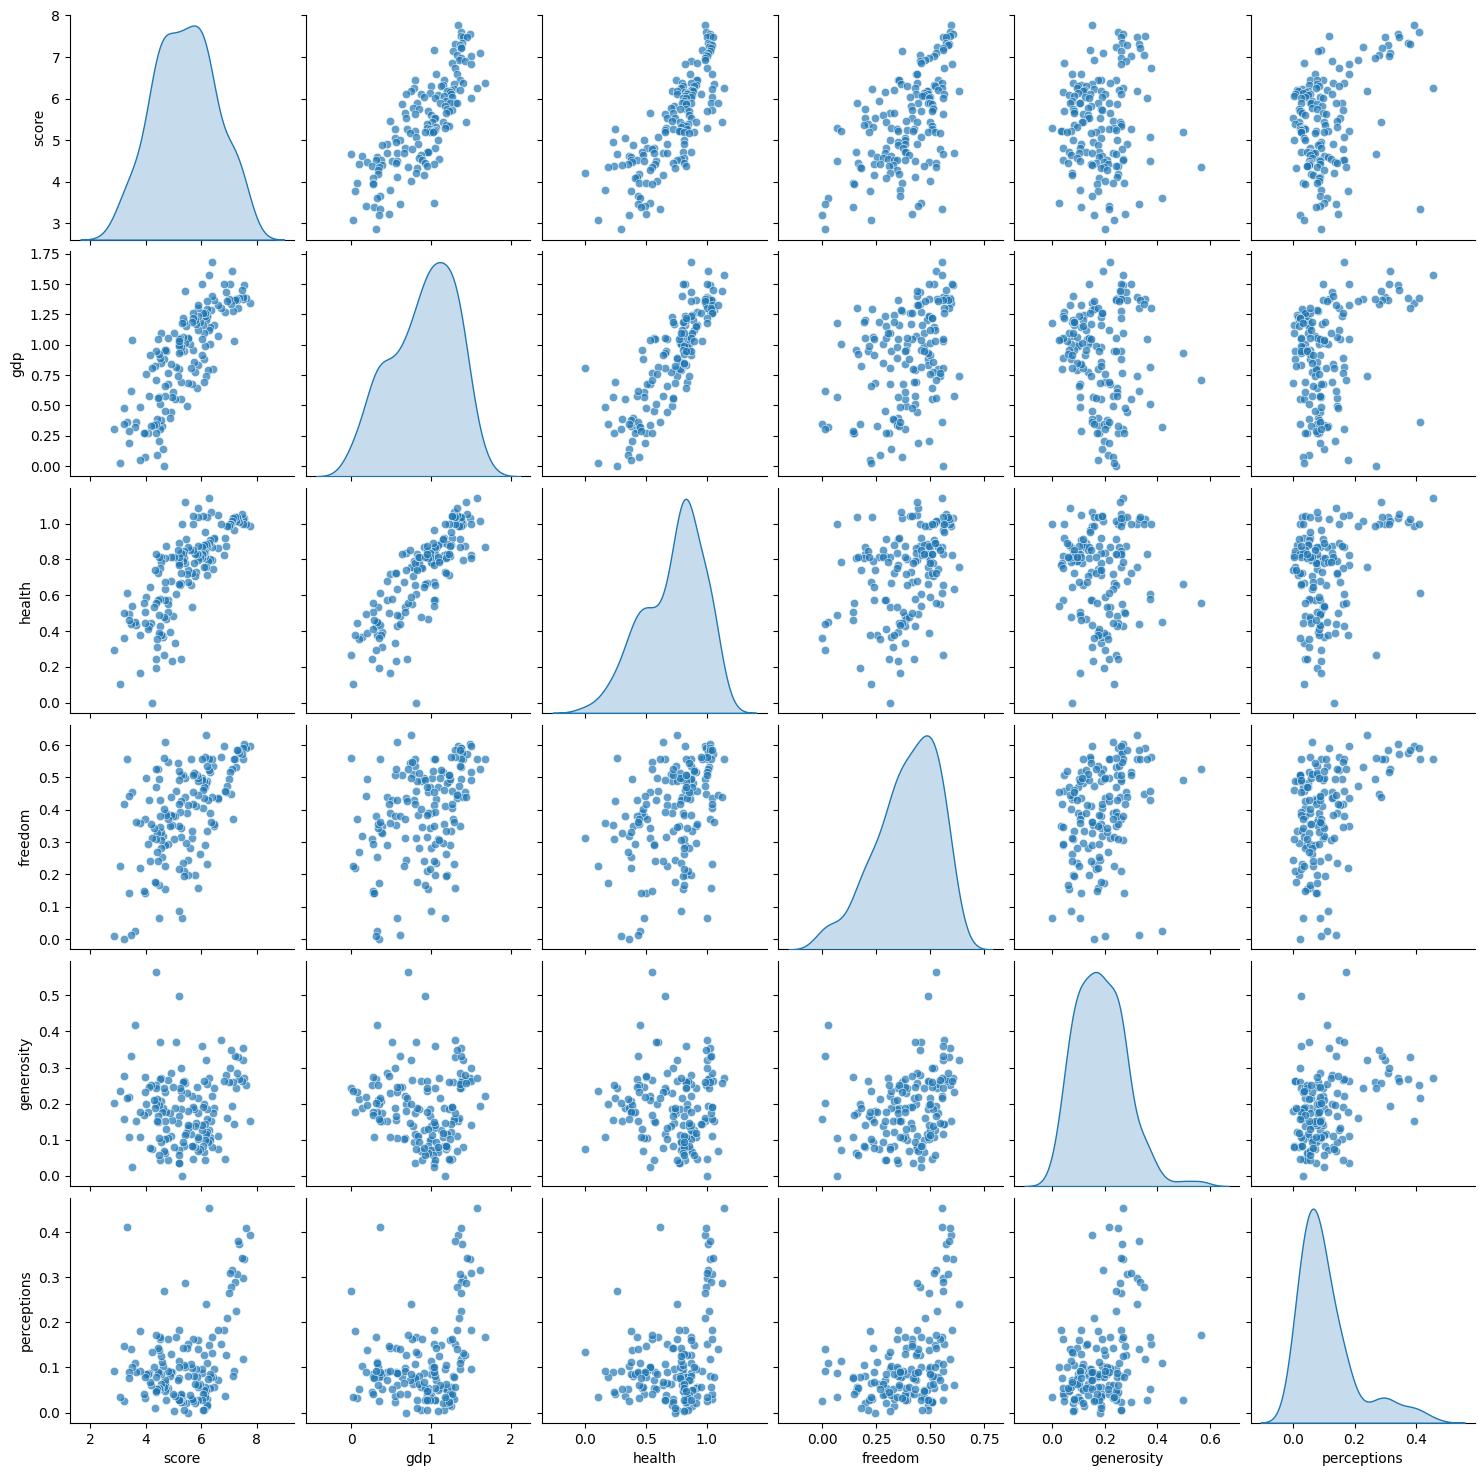

In [36]:
# Pair Plot: Relationships between all the features
sns.pairplot(data, diag_kind="kde", plot_kws={'alpha': 0.7})
plt.show()

## Freedom Distribution Across Happiness Levels

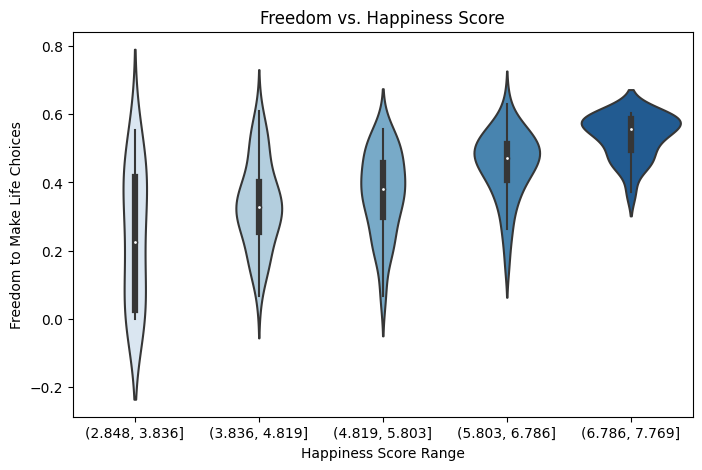

In [37]:
# Violon Plot: the distribution of freedom across different happiness levels
plt.figure(figsize=(8, 5))
sns.violinplot(x=pd.cut(data["score"], bins=5), y=data["freedom"], palette="Blues")
plt.xlabel("Happiness Score Range")
plt.ylabel("Freedom to Make Life Choices")
plt.title("Freedom vs. Happiness Score")
plt.show()

# Egypt’s Happiness Score vs. Global Average

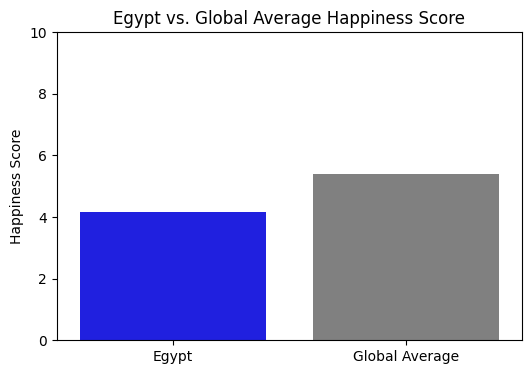

In [38]:
# Bar Plot: Egpyt's happiness score vs. the gloabla avg
egypt = data[data["country"] == "Egypt"]
global_avg = data["score"].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=["Egypt", "Global Average"], y=[egypt["score"].values[0], global_avg], palette=["blue", "gray"])
plt.ylabel("Happiness Score")
plt.title("Egypt vs. Global Average Happiness Score")
plt.ylim(0, 10)
plt.show()

# Egypt’s Economic & Social Factors Compared to Top 10 Countries

<Figure size 1000x500 with 0 Axes>

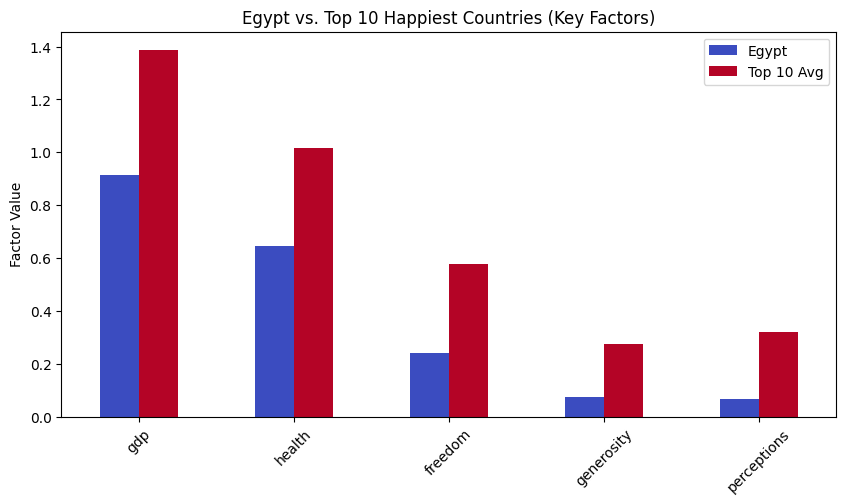

In [40]:
# Bar Plot: Comparing Egypt's economic and social factors to top 10 contries
top_10 = data.nlargest(10, "score")
features = ["gdp", "health", "freedom", "generosity", "perceptions"]
egypt_values = egypt[features].values[0]
top_10_avg = top_10[features].mean()
plt.figure(figsize=(10, 5))
df_compare = pd.DataFrame({"Egypt": egypt_values, "Top 10 Avg": top_10_avg})
df_compare.plot(kind="bar", figsize=(10, 5), colormap="coolwarm")
plt.xticks(range(len(features)), features, rotation=45)
plt.ylabel("Factor Value")
plt.title("Egypt vs. Top 10 Happiest Countries (Key Factors)")
plt.show()

# Egypt’s Ranking Among Middle Eastern & African Countries

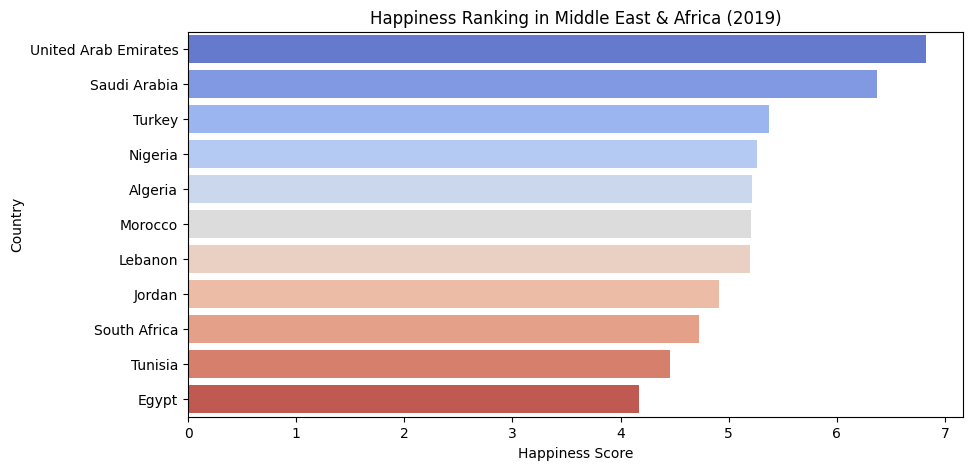

In [41]:
# Bar Plot: Egypt’s ranking compared to other Middle Eastern & African nations.
middle_east_africa = ["Egypt", "Saudi Arabia", "United Arab Emirates", "Lebanon", "Turkey", 
                      "Jordan", "Morocco", "Tunisia", "South Africa", "Nigeria", "Algeria"]
regional_df = data[data["country"].isin(middle_east_africa)].sort_values("score", ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(y=regional_df["country"], x=regional_df["score"], palette="coolwarm")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.title("Happiness Ranking in Middle East & Africa (2019)")
plt.show()

# Egypt’s Position in GDP vs. Happiness Score Correlation

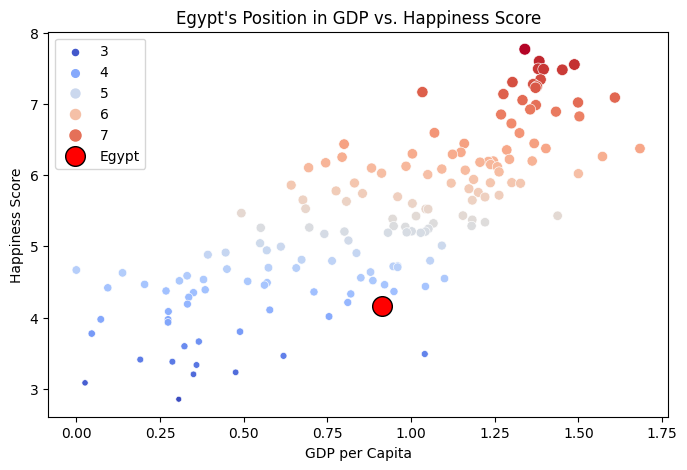

In [44]:
# Scatter Plot: Egypt’s position in the GDP vs. Happiness Score correlation.
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["gdp"], y=data["score"], hue=data["score"], palette="coolwarm", size=data["score"])
plt.scatter(egypt["gdp"], egypt["score"], color="red", s=200, label="Egypt", edgecolors="black")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("Egypt's Position in GDP vs. Happiness Score")
plt.legend()
plt.show()

# Key Insights from the Data
* The highest-ranking countries include Finland, Denmark, Norway, Iceland, and the Netherlands, european nations dominate the top spots, suggesting strong social support, high GDP, and low corruption.

* Countries with higher economic prosperity tend to have higher happiness scores.

* The happiness scores are normally distributed, with most countries having a moderate happiness score.

* Strong positive correlations between happiness and GDP and Health.


# Key Insights of Egpyt
* Egypt's happiness score is below the global average.

* Egypt scores lower on GDP, health, freedom, and generosity than the world's happiest nations.

* Egypt ranks lower than Gulf countries but higher than some African nations.

* Egypt is positioned in the lower-middle range, confirming economic challenges impact happiness.